The data is extracted from an Organic Chemistry I course on Canvas.
The personal information of individual students is removed; 
Each student data is in one row; the first row is the maximum score can be earned in each column, or 0 for non-score columns, and '(read only)' for Canvas calculatd metrics;
'EX' means the student is excused from the assignment;

Till Exam 1, the class had 6 lectures (online videos), 10 in-class quizzes (9 were graded), 4 assignments. The time (h) each student spent online is listed in the 'Time_online' column.
This kernel will host a report generator for the Canvas course data.


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Allow several prints in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Course2.csv
/kaggle/input/Course1.csv


In [2]:
def clear_column_names(df):
    import re
    cols = list(df.columns)
    cols = ['_'.join(re.sub(" \([0-9]*\)", "",i).split(' ')) for i in cols]
#     print(cols)
    df.columns = cols
    return

def drop_nulls_50(df):
    '''
    drop all the columns that have more than 50% NAN
    '''
    drop_list = []
    for c in df:
        if df[c].isnull().sum() > len(df)//2:
            drop_list.append(c)
    df.drop(drop_list, axis = 1, inplace = True)
    return

def extract_columns(df):
    to_keep = [i for i in list(df.columns) if i != 'confirmation_of_attendence' and df[i][0] != '(read only)']
    df = df[to_keep]
    return df

def add_percent_cols(df):
    ls = list(df.columns) 
    lectures = [i for i in ls if i.startswith('Lec') or i.startswith('Nom')]
    assignments = [i for i in ls if i.startswith('A')]
    quizzes = [i for i in ls if i.startswith('Q')]
    n_l, n_a, n_q = len(lectures), len(assignments), len(quizzes)
    df['lecture_%_(' + str(n_l) + ')_counts'] = 100 * (df[lectures] != 0).astype(int).sum(axis = 1) / n_l
    df['assignment_%_(' + str(n_a) + ')_counts'] = 100 * (df[assignments] != 0).astype(int).sum(axis = 1) / n_a
    df['quizzes_%_(' + str(n_q) + ')_counts'] = 100 * (df[quizzes] != 0).astype(int).sum(axis = 1) / n_q
    df['overall_attendance'] = 100 * (df[lectures + assignments + quizzes] != 0).astype(int).sum(axis = 1) / (n_l + n_a + n_q)
    return df

def plot_e1_corr(df):
    corr = df.iloc[1:, 1:].corr()
#     print(corr.Exam_1)
#     print(df.iloc[:, 1])
    
    plt.rcParams["figure.figsize"] = (14,8)
    sns.scatterplot(x = list(corr.columns), y = corr.Exam_1 )
    plt.xticks(rotation = 65);

In [3]:
def report(df):
    '''
    generate a report for give dataframe
    '''
    # remove 'test student'
    df = df[:-1]
    
    clear_column_names(df)
    
    drop_nulls_50(df)
    
    df = extract_columns(df)
#     print(df.columns)
    df = df.replace('EX', 0)
    df = df.fillna(0)
    df = df.astype(float)
    
    df = add_percent_cols(df)
    
    plot_e1_corr(df)
    
    return df

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

file = '/kaggle/input/Course1.csv'
df1 = pd.read_csv(file)

df1.head()

,Unnamed: 0,Lecture 1 (4877945),Lecture 2 (4877949),Lecture 3 (4877950),Nomenclatures (4877961),Lecture 4 (4877951),Lecture 5 (4877952),Lecture 6 (4877953),Lecture 7 (4877954),Lecture 8 (4877955),Lecture 9 (4877956),Lecture 10 (4877946),Lecture 11 (4877947),Lecture 12 (4877948),Q2 (4877963),Q3 (4877964),Q5 (4877966),Q6 (4877967),Q7 (4877968),Q8 (4906457),Q9 (4907005),Q10 (4907483),Feedback (4877920),Assignment 1 (4877927),Assignment 2 (4877930),Assignment 3 (4877931),Assignment 4 (4877932),Assignment 5 (4877933),Assignment 6 (4877934),Assignment 7 (4877935),Assignment 8 (4877937),Assignment 9 (4877938),Assignment 10 (4877928),ACS (4877923),Exam 1 (4877939),Exam 2 (4877940),Exam 3 (4877943),Roll Call Attendance 1 (4877969),confirmation of attendence (4877922),ACS Raw sub penalty (4877924),Lecture videos + Quizzes Current Score,Lecture videos + Quizzes Unposted Current Score,Lecture videos + Quizzes Final Score,Lecture videos + Quizzes Unposted Final Score,Homework Current Score,Homework Unposted Current Score,Homework Final Score,Homework Unposted Final Score,Final Current Score,Final Unposted Current Score,Final Final Score,Final Unposted Final Score,Hour Exams Current Score,Hour Exams Unposted Current Score,Hour Exams Final Score,Hour Exams Unposted Final Score,Assignments Current Score,Assignments Unposted Current Score,Assignments Final Score,Assignments Unposted Final Score,Imported Assignments Current Score,Imported Assignments Unposted Current Score,Imported Assignments Final Score,Imported Assignments Unposted Final Score,Current Score,Unposted Current Score,Final Score,Unposted Final Score,Current Grade,Unposted Current Grade,Final Grade,Unposted Final Grade,Time_online
0,0,10.00,10.00,10.0,10.00,10.0,10.0,10.0,10.0,20.0,10.0,10.0,15.0,15.0,5.00,5.0,5.0,5.0,5.0,5.00,5.00,5.00,5.0,10.0,10.0,10.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,100.0,9.0,1.0,70.0,(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),0.0
1,1,10.00,10.00,10.0,0.00,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,4.0,4.0,3.0,0.0,4.00,4.00,4.00,NaN,0.0,8.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,73.00,73.00,38.42,38.42,20.00,20.00,7.62,7.62,NaN,NaN,0.00,0.00,34.00,34.00,11.33,11.33,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,40.00,40.00,15.63,15.63,F,F,F,F,12.0
2,2,10.00,10.00,10.0,10.00,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,4.0,3.0,4.0,4.0,4.00,4.00,4.00,NaN,10.0,8.0,10.00,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,91.00,91.00,47.89,47.89,95.00,95.00,36.19,36.19,NaN,NaN,0.00,0.00,57.00,57.00,19.00,19.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,70.16,70.16,26.41,26.41,C,C,F,F,18.0
3,3,10.00,10.00,10.0,10.00,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,5.0,3.0,5.0,4.0,4.00,4.00,4.00,NaN,10.0,8.0,10.00,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,1.0,NaN,93.00,93.00,48.95,48.95,95.00,95.00,36.19,36.19,NaN,NaN,0.00,0.00,89.00,89.00,29.67,29.67,100.00,100.00,1.25,1.25,NaN,NaN,NaN,NaN,90.79,90.79,33.02,33.02,A,A,F,F,10.0
4,4,10.00,10.00,10.0,10.00,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,4.0,4.0,3.0,4.0,4.00,4.00,4.00,NaN,10.0,9.0,10.00,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,1.0,NaN,91.00,91.00,47.89,47.89,97.50,97.50,37.14,37.14,NaN,NaN,0.00,0.00,80.00,80.00,26.67,26.67,100.00,100.00,1.25,1.25,NaN,NaN,NaN,NaN,85.08,85.08,31.15,31.15,B,B,F,F,27.0


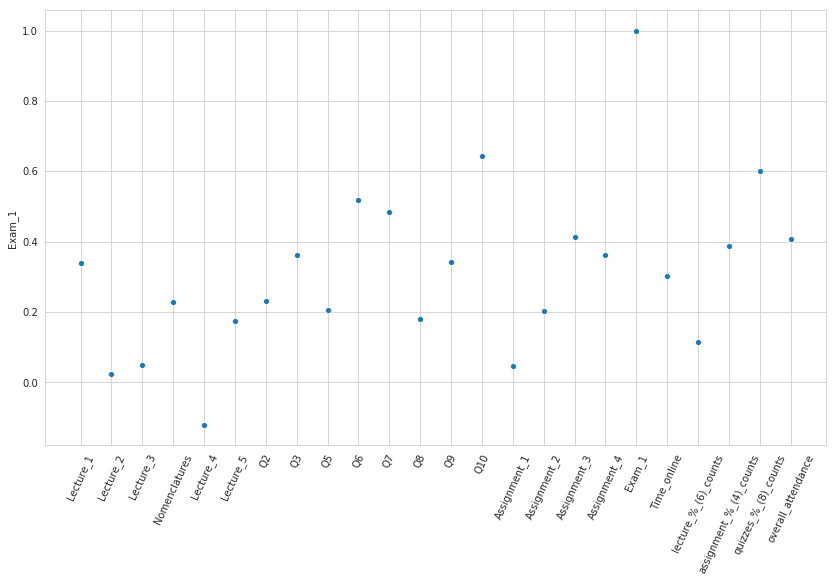

In [5]:
df1 = report(df1)

In [6]:
file = '/kaggle/input/Course2.csv'
df2 = pd.read_csv(file)

df2.head()

,Unnamed: 0,Roll Call Attendance 1 (4878107),confirmation of attendence (4878060),ACS Raw sub penalty (4878063),Lecture 1 (4878083),Lecture 2 (4878087),Lecture 3 (4878088),Nomenclatures (4878099),Lecture 4 (4878089),Lecture 5 (4878090),Lecture 6 (4878091),Lecture 7 (4878092),Lecture 8 (4878093),Lecture 9 (4878094),Lecture 10 (4878084),Lecture 11 (4878085),Lecture 12 (4878086),Q2 (4878101),Q3 (4878102),Q4 (4878103),Q5 (4878104),Q6 (4878105),Q7 (4878106),Q8 (4906458),Q9 (4907004),Q10 (4907482),Feedback (4878059),Assignment 1 (4878066),Assignment 2 (4878069),Assignment 3 (4878070),Assignment 4 (4878071),Assignment 5 (4878072),Assignment 6 (4878073),Assignment 7 (4878074),Assignment 8 (4878076),Assignment 9 (4878077),Assignment 10 (4878067),ACS (4878062),Exam 1 (4878078),Exam 2 (4878079),Exam 3 (4878081),Lecture videos + Quizzes Current Score,Lecture videos + Quizzes Unposted Current Score,Lecture videos + Quizzes Final Score,Lecture videos + Quizzes Unposted Final Score,Homework Current Score,Homework Unposted Current Score,Homework Final Score,Homework Unposted Final Score,Final Current Score,Final Unposted Current Score,Final Final Score,Final Unposted Final Score,Hour Exams Current Score,Hour Exams Unposted Current Score,Hour Exams Final Score,Hour Exams Unposted Final Score,Assignments Current Score,Assignments Unposted Current Score,Assignments Final Score,Assignments Unposted Final Score,Imported Assignments Current Score,Imported Assignments Unposted Current Score,Imported Assignments Final Score,Imported Assignments Unposted Final Score,Current Score,Unposted Current Score,Final Score,Unposted Final Score,Current Grade,Unposted Current Grade,Final Grade,Unposted Final Grade,Time_online
0,0,9.0,1.0,70.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0,15.0,15.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.00,5.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,100.0,(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),(read only),0.0
1,1,NaN,1.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,EX,5.0,10.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.00,97.00,51.05,51.05,77.78,77.78,33.33,33.33,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,100.00,100.00,1.25,1.25,NaN,NaN,NaN,NaN,88.76,88.76,15.21,15.21,B,B,F,F,17.0
2,2,NaN,NaN,NaN,10.0,10.0,10.0,10.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.00,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,80.95,80.95,43.59,43.59,100.00,100.00,38.10,38.10,NaN,NaN,0.00,0.00,78.00,78.00,26.00,26.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,82.10,82.10,30.03,30.03,B,B,F,F,34.0
3,3,NaN,1.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,EX,NaN,10.0,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,95.00,95.00,50.00,50.00,97.50,97.50,37.14,37.14,NaN,NaN,0.00,0.00,82.00,82.00,27.33,27.33,100.00,100.00,1.25,1.25,NaN,NaN,NaN,NaN,87.18,87.18,31.97,31.97,B,B,F,F,19.0
4,4,NaN,1.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,5.0,3.0,5.0,4.0,4.0,4.00,NaN,10.0,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,94.29,94.29,50.77,50.77,97.50,97.50,37.14,37.14,NaN,NaN,0.00,0.00,80.00,80.00,26.67,26.67,100.00,100.00,1.25,1.25,NaN,NaN,NaN,NaN,85.77,85.77,31.73,31.73,B,B,F,F,10.0


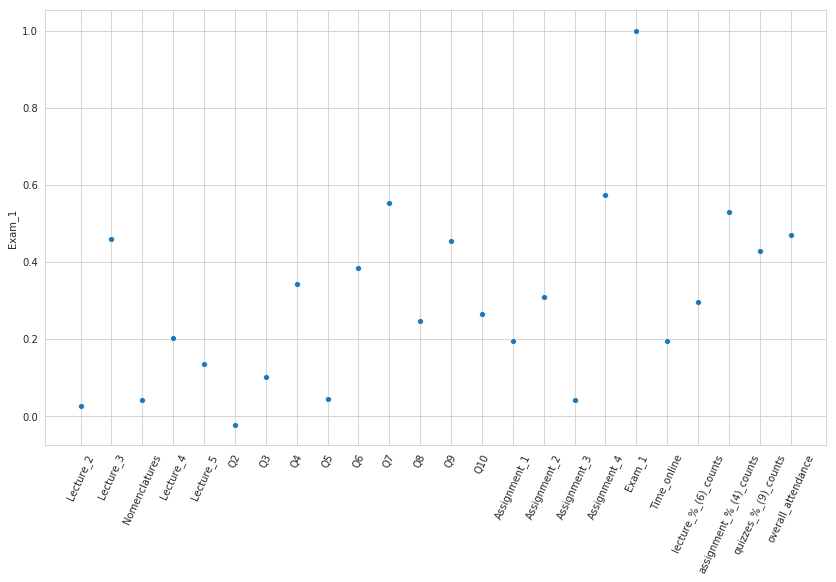

In [7]:
df2 = report(df2)

In [8]:
df1

,Unnamed:_0,Lecture_1,Lecture_2,Lecture_3,Nomenclatures,Lecture_4,Lecture_5,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10,Assignment_1,Assignment_2,Assignment_3,Assignment_4,Exam_1,Time_online,lecture_%_(6)_counts,assignment_%_(4)_counts,quizzes_%_(8)_counts,overall_attendance
0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,10.0,10.0,10.0,10.0,100.0,0.0,100.000000,100.0,100.0,100.000000
1,1.0,10.0,10.0,10.0,0.0,10.0,10.0,0.0,4.0,4.0,3.0,0.0,4.0,4.0,4.0,0.0,8.0,0.0,0.0,34.0,12.0,83.333333,25.0,75.0,66.666667
2,2.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,10.0,8.0,10.0,10.0,57.0,18.0,100.000000,100.0,100.0,100.000000
3,3.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,5.0,3.0,5.0,4.0,4.0,4.0,4.0,10.0,8.0,10.0,10.0,89.0,10.0,100.000000,100.0,100.0,100.000000
4,4.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,10.0,9.0,10.0,10.0,80.0,27.0,100.000000,100.0,100.0,100.000000
5,5.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,10.0,9.0,10.0,10.0,49.0,16.0,100.000000,100.0,100.0,100.000000
6,6.0,10.0,10.0,10.0,10.0,10.0,5.0,4.0,5.0,3.0,4.0,4.0,4.0,4.0,4.0,10.0,8.0,10.0,10.0,33.0,11.0,100.000000,100.0,100.0,100.000000
7,7.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,10.0,9.0,10.0,10.0,57.0,18.0,100.000000,100.0,100.0,100.000000
8,8.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,10.0,8.0,10.0,10.0,53.0,26.0,100.000000,100.0,100.0,100.000000
9,9.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,4.0,3.0,4.0,5.0,4.0,4.0,4.0,10.0,10.0,10.0,10.0,56.0,17.0,100.000000,100.0,100.0,100.000000
